# surfOpt: Python framework for genetic algorithm testing
Set of functions and classes to test genetic algorithms (GAs) when solving user provided optimization problems. The framework aims to provide different major families of GAs which are customizable with different combinations of algorithms for each of their steps (e.g. Selection, crossover, mutation, etc.). The goal is to facilitate the creation of different "flavors" of similar GAs and compare their performance at optimizing particular problems.

In [86]:
# load all the required functions
%run imports.py
%run distances.py
%run surfaces.py
%run populators.py
%run reproduction.py
%run survival.py
%run genetics.py

## Surface objects
Surface objects are the "problems" to be solved by the genetic algoritm (GA). In this exmaple we will create a 3-dimensional (3D) surface object. To do this, we must provide a function that takes an array of two values (the values that the random variables $x$ and $y$ will take) and their boundaries in the search space (minimum and maximum values for both variables). The object has a method to graphically visualize the landscape of the 3D surface given by the provided function.

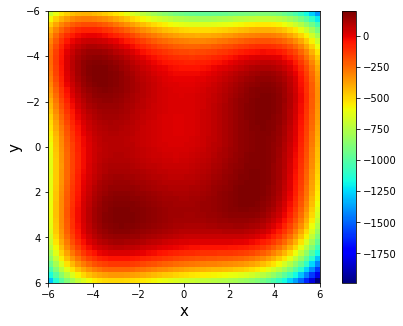

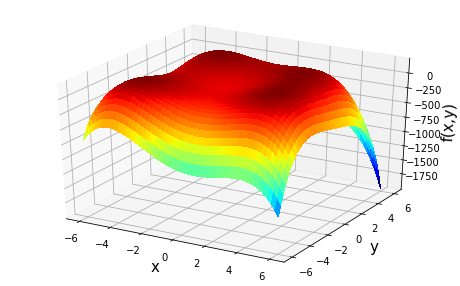

In [88]:
def himmelblau(x): # a famous test function for mutimodal optimization [1]
      return 200 - np.power((np.power(x[0], 2) + x[1] - 11), 2) - np.power((x[0] + np.power(x[1], 2) - 7), 2)

exSurf1 = Surf3d(himmelblau, [-6, -6], [6, 6]) # provide funcion, lower limits [x, y] and uper limits [x, y]
exSurf1.plot2d()
exSurf1.plot3d()

## Genetic algorithm object
These are configurable objects that carry all subroutines to be performed by the GA. In this example we will implement a Differential Evolution (DE) GA \[2\], which must be created with the following initial parameters:

- Population size.
- Scaling factor: controls the size of the steps in the search space.
- Crossover probability.
- Maximum number of evaluations.

Aditionally, we must set the type of algorithm that we want to use in the GA for initializing the population, for reproduction and for survival. As this is a DE GA, reproduction operands alone will entail selection/crossover/mutation so there is no need to set them separately in this example.

In [89]:
exGA1 = diffEvolver(10, 0.5, 0.9, 10000) # population size, scaling factor, crossover probability and maximum number of evaluations
exGA1.setPopulator(realInd) # simple real-valued individuals
exGA1.setReproduction(DERandOneExp) # random selection for mutation, 1 differential and exponential crossover (DE/rand/1/exp) [3]
exGA1.setSurvival(DEcrowd) # crowding DE [4]
exGA1.setDistance(eucledianDist) # use eucledian distance for survival procedure
exGA1.evolve(exSurf1) # runs the evolutionary process

GENERATION: 1 / Fitness evaluations: 0. Mean fitness is -206.94, Showing top 10 individuals...
	Fitness: 91.00 / Genotype: ['-1.95', '-1.99']
	Fitness: 76.93 / Genotype: ['-2.21', '-0.62']
	Fitness: 29.22 / Genotype: ['0.43', '-2.01']
	Fitness: -0.99 / Genotype: ['4.23', '-4.08']
	Fitness: -114.49 / Genotype: ['-5.37', '-4.95']
	Fitness: -206.70 / Genotype: ['-1.11', '-4.71']
	Fitness: -315.75 / Genotype: ['-0.76', '-4.95']
	Fitness: -451.88 / Genotype: ['1.17', '-5.16']
	Fitness: -518.77 / Genotype: ['-3.06', '-5.98']
	Fitness: -657.99 / Genotype: ['4.81', '-5.54']
GENERATION: 51 / Fitness evaluations: 1000. Mean fitness is 182.13, Showing top 10 individuals...
	Fitness: 199.24 / Genotype: ['-2.95', '3.18']
	Fitness: 198.44 / Genotype: ['3.41', '-1.71']
	Fitness: 195.25 / Genotype: ['-3.50', '-3.34']
	Fitness: 194.82 / Genotype: ['3.74', '-1.32']
	Fitness: 193.91 / Genotype: ['3.85', '-2.25']
	Fitness: 193.26 / Genotype: ['-3.52', '-2.90']
	Fitness: 193.25 / Genotype: ['3.31', '2.25']

## Results
As seen in the last cell, the evolutionary process prints a log of the results but the final population and its evaluations can be retrieved by using the syntax `[name of object].pop` and `[name of object].evals` respectively for further analyses. Aditionally, a function is provided to quickly visualize the solutions found by the GA in the search space of the studied surface.  

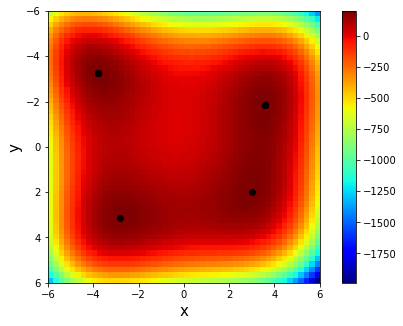

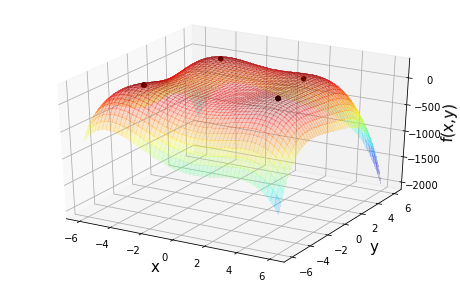

In [90]:
exSurf1.plot2d(exGA1)
exSurf1.plot3d(exGA1)

## Another example
Here is another more complex surface with multiple local optima. We will create a new GA object and tweak the settings (bigger population and a higher number of maximum evaluations) in order to visualize how a slightly more complex evolutionary problem looks like.

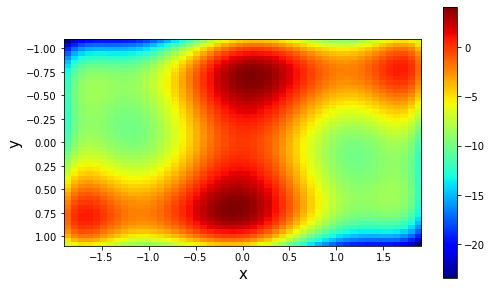

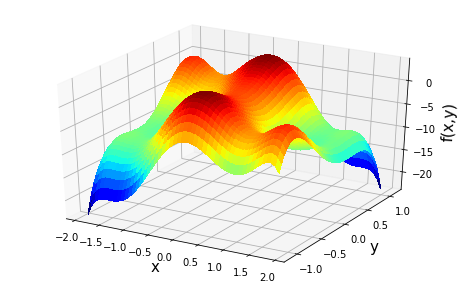

GENERATION: 1 / Fitness evaluations: 0. Mean fitness is -4.25, Showing top 10 individuals...
	Fitness: 3.97 / Genotype: ['0.02', '-0.65']
	Fitness: 3.83 / Genotype: ['0.06', '-0.80']
	Fitness: 3.76 / Genotype: ['-0.06', '-0.71']
	Fitness: 3.53 / Genotype: ['0.10', '0.68']
	Fitness: 3.23 / Genotype: ['0.13', '0.63']
	Fitness: 3.18 / Genotype: ['0.08', '0.82']
	Fitness: 3.12 / Genotype: ['-0.06', '0.51']
	Fitness: 2.51 / Genotype: ['0.28', '-0.52']
	Fitness: 2.46 / Genotype: ['0.12', '0.49']
	Fitness: 1.98 / Genotype: ['-0.31', '0.48']
GENERATION: 11 / Fitness evaluations: 2000. Mean fitness is -2.21, Showing top 10 individuals...
	Fitness: 4.04 / Genotype: ['-0.17', '0.71']
	Fitness: 4.03 / Genotype: ['0.13', '-0.67']
	Fitness: 4.03 / Genotype: ['0.06', '-0.66']
	Fitness: 4.02 / Genotype: ['0.17', '-0.74']
	Fitness: 3.83 / Genotype: ['-0.07', '0.80']
	Fitness: 3.80 / Genotype: ['-0.02', '0.61']
	Fitness: 3.77 / Genotype: ['-0.05', '-0.67']
	Fitness: 3.53 / Genotype: ['0.10', '0.68']
	Fi

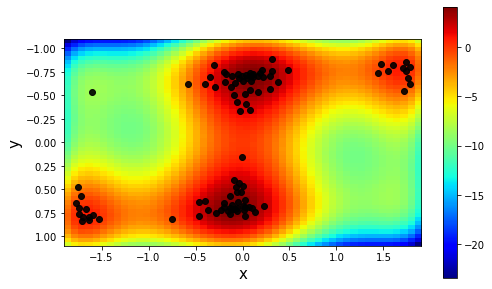

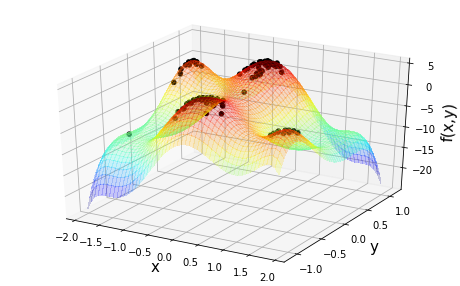

In [92]:
def six_hump_camel_back(x): # [1]
    return -4 * ((4 - 2.1 * np.power(x[0],2) + np.power(x[0],4)/3) * np.power(x[0],2)+x[0]*x[1]+(4*np.power(x[1],2)-4)*np.power(x[1],2))

exSurf2 = Surf3d(six_hump_camel_back, [-1.9, -1.1], [1.9, 1.1])
exSurf2.plot2d()
exSurf2.plot3d()

exGA2 = diffEvolver(100, 0.5, 0.9, 20000)
exGA2.setPopulator(realInd)
exGA2.setReproduction(DERandOneExp)
exGA2.setSurvival(DEcrowd)
exGA2.setDistance(eucledianDist)
exGA2.evolve(exSurf2)

exSurf2.plot2d(exGA2)
exSurf2.plot3d(exGA2)

# References
1. Jamil, Momin & Yang, Xin-She. (2013). A Literature Survey of Benchmark Functions For Global Optimization Problems. Int. J. of Mathematical Modelling and Numerical Optimisation. 4. 10.1504/IJMMNO.2013.055204.
2. Storn, R. and Price, K. (1997). "Differential evolution - a simple and efficient heuristic for global optimization over continuous spaces". Journal of Global Optimization. 11 (4): 341–359. doi:10.1023/A:1008202821328.
3. Tvrdik, Josef. (2008). Adaptive differential evolution and exponential crossover. Proceedings of the International Multiconference on Computer Science and Information Technology, IMCSIT 2008. 3. 927 - 931. 10.1109/IMCSIT.2008.4747353.
4. Bi, X. & Wang, Y.. (2011). Multimodal function optimization using a crowding differential evolution. 32. 223-227. 10.3969/j.issn.1006-7043.2011.02.015.